In [28]:
import matplotlib.pyplot as plt
import pandas as pd

# Study data files
fema_data_path = "PublicAssistanceFundedProjectsSummaries.csv"

fema_data_df = pd.read_csv(fema_data_path)




In [29]:
fema_data_df.describe()

,disasterNumber,educationApplicant,numberOfProjects,federalObligatedAmount,Unnamed: 12,Unnamed: 13,year,Month
count,162221.000000,162221.000000,162221.000000,1.622210e+05,0.0,0.0,162221.000000,162221.000000
mean,2671.181808,0.092121,4.568650,6.911045e+05,NaN,NaN,2008.390936,5.760376
std,1167.415488,0.289198,18.167931,3.701386e+07,NaN,NaN,5.512668,3.139247
min,1239.000000,0.000000,0.000000,-1.850352e+06,NaN,NaN,1998.000000,1.000000
25%,1632.000000,0.000000,1.000000,5.807130e+03,NaN,NaN,2004.000000,3.000000
50%,1958.000000,0.000000,2.000000,1.930325e+04,NaN,NaN,2008.000000,6.000000
75%,4071.000000,0.000000,4.000000,7.573388e+04,NaN,NaN,2012.000000,9.000000
max,4556.000000,1.000000,2685.000000,1.145426e+10,NaN,NaN,2020.000000,12.000000


In [30]:
fema_data_df.columns

Index(['disasterNumber', 'declarationDate', 'incidentType', 'state', 'county',
       'applicantName', 'educationApplicant', 'numberOfProjects',
       'federalObligatedAmount', 'hash', 'lastRefresh', 'id', 'Unnamed: 12',
       'Unnamed: 13', 'year', 'Unnamed: 15', 'Month', 'tionDate'],
      dtype='object')

In [31]:
#filtered data
filtered_data_df=fema_data_df[["disasterNumber", "year","Month", "state","county","federalObligatedAmount"]]



filtered_data_df.head(100)

,disasterNumber,year,Month,state,county,federalObligatedAmount
0,1239,1998,8,Texas,Kimble,2850.00
1,1239,1998,8,Texas,Statewide,692215.50
2,1239,1998,8,Texas,Kinney,5016.00
3,1239,1998,8,Texas,Kinney,248569.77
4,1239,1998,8,Texas,Kinney,3842.44
...,...,...,...,...,...,...
95,1247,1998,9,Puerto Rico,NaN,26382.29
96,1247,1998,9,Puerto Rico,NaN,2435023.16
97,1247,1998,9,Puerto Rico,NaN,21611.61
98,1247,1998,9,Puerto Rico,NaN,7487.10


In [32]:
#Disatser Numbers are 4332 for Harvey and 4086 for Sandy

In [33]:
#Harvey DF
harvey_df = filtered_data_df.loc[filtered_data_df["disasterNumber"]== 4332]

harvey_df.head(10)


,disasterNumber,year,Month,state,county,federalObligatedAmount
147836,4332,2017,8,Texas,Aransas,3111.33
147837,4332,2017,8,Texas,Aransas,213071.38
147838,4332,2017,8,Texas,Aransas,54716275.48
147839,4332,2017,8,Texas,Aransas,119678.08
147840,4332,2017,8,Texas,Aransas,104573.82
147841,4332,2017,8,Texas,Aransas,9340336.25
147842,4332,2017,8,Texas,Aransas,441295.01
147843,4332,2017,8,Texas,Aransas,44587.27
147844,4332,2017,8,Texas,Aransas,30184.76
147845,4332,2017,8,Texas,Aransas,4713351.37


In [34]:
#bar chart of fema spending in counties in 2017

harvey_counties_df = harvey_df.groupby("county")["federalObligatedAmount"].sum()


harvey_counties_df = pd.DataFrame(harvey_counties_df)
harvey_counties_df.head()


,federalObligatedAmount
county,
Aransas,75572759.31
Austin,1234952.30
Bastrop,2766330.44
Bee,958795.65
Brazoria,26216581.00


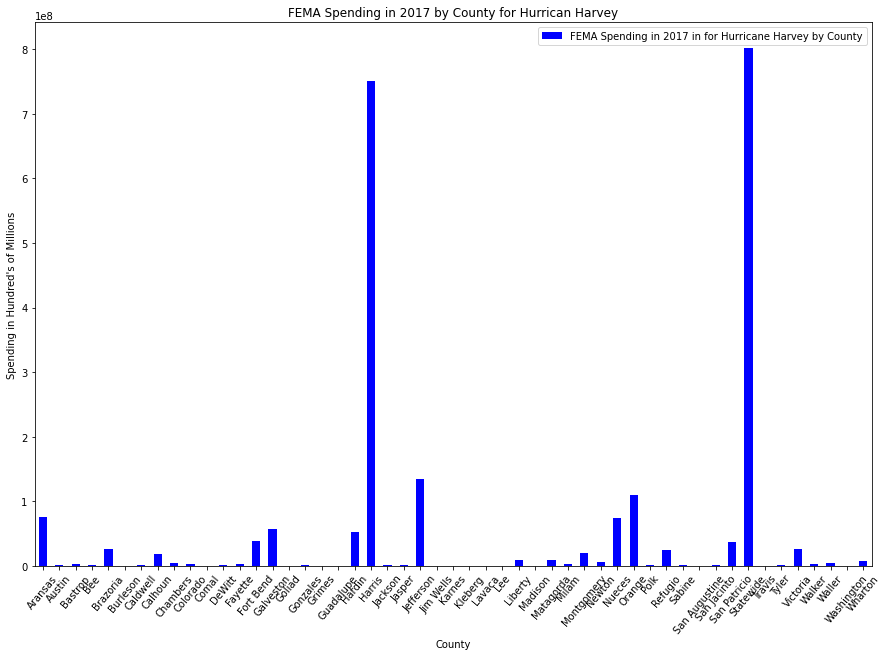

In [35]:
# Charting



harvey_counties_df.plot(kind="bar",y="federalObligatedAmount",figsize =(15,10), label="FEMA Spending in 2017 in for Hurricane Harvey by County", color="b")



plt.title("FEMA Spending in 2017 by County for Hurrican Harvey")
plt.xlabel("County")
plt.ylabel("Spending in Hundred's of Millions")
plt.xticks(rotation= 50)

plt.savefig('FEMA Spending in 2017 in for Hurricane Harvey by County.png')

In [36]:
#bar chart of fema spending in texas by year

#group by year
harvey_year_filter_df = filtered_data_df.loc[filtered_data_df["state"]== "Texas"]

harvey_year_filter_df


,disasterNumber,year,Month,state,county,federalObligatedAmount
0,1239,1998,8,Texas,Kimble,2850.00
1,1239,1998,8,Texas,Statewide,692215.50
2,1239,1998,8,Texas,Kinney,5016.00
3,1239,1998,8,Texas,Kinney,248569.77
4,1239,1998,8,Texas,Kinney,3842.44
...,...,...,...,...,...,...
161403,4485,2020,3,Texas,Tarrant,20374.58
161404,4485,2020,3,Texas,Tarrant,12120.00
161504,4485,2020,3,Texas,Statewide,1823862.67
161568,4485,2020,3,Texas,Harris,963445.37


In [37]:

harvey_year_df = harvey_year_filter_df.groupby("year")["federalObligatedAmount"].sum()

harvey_year_df = pd.DataFrame(harvey_year_df)
harvey_year_df.head(10)


,federalObligatedAmount
year,
1998,4.018717e+07
1999,1.106155e+07
2000,3.633285e+06
2001,4.664082e+08
2002,2.704569e+07
2003,2.327349e+07
2005,8.821367e+08
2006,4.036200e+07
2007,7.808715e+07


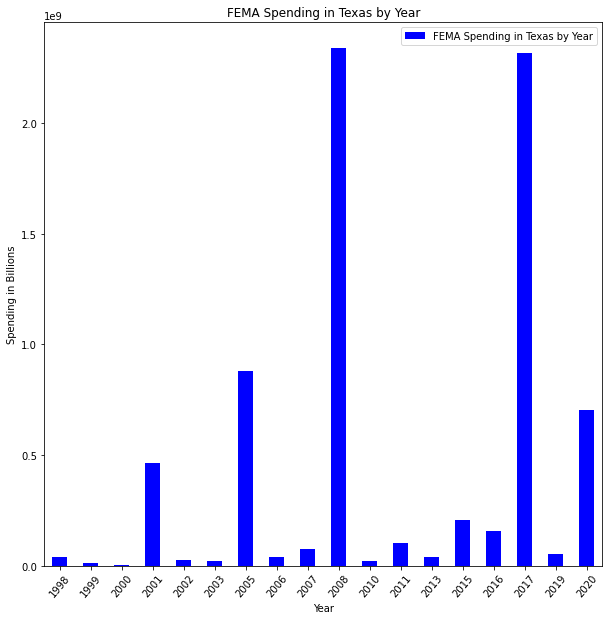

In [38]:
# Chart over year

harvey_year_df.plot(kind="bar",y="federalObligatedAmount",figsize =(10,10), label="FEMA Spending in Texas by Year", color="b")



plt.title("FEMA Spending in Texas by Year")
plt.xlabel("Year")
plt.ylabel("Spending in Billions")
plt.xticks(rotation= 50)
plt.savefig('FEMA Spending in Texas by Year.png')

In [39]:
#Sandy DF
sandy_df = filtered_data_df.loc[filtered_data_df["disasterNumber"]==4086]

sandy_df.head()

,disasterNumber,year,Month,state,county,federalObligatedAmount
124620,4086,2012,10,New Jersey,Atlantic,59925.40
124621,4086,2012,10,New Jersey,Atlantic,1399582.85
124622,4086,2012,10,New Jersey,Atlantic,15013202.82
124623,4086,2012,10,New Jersey,Atlantic,270289.24
124624,4086,2012,10,New Jersey,Atlantic,11221.64


In [40]:
sandy_counties_df = sandy_df.groupby("county")["federalObligatedAmount"].sum()


sandy_counties_df = pd.DataFrame(sandy_counties_df)
sandy_counties_df.head(50)

,federalObligatedAmount
county,
Atlantic,3.491963e+07
Bergen,6.710471e+07
Burlington,4.926638e+06
Camden,2.075818e+06
Cape May,2.474766e+07
Cumberland,4.512798e+06
Essex,2.378506e+07
Gloucester,8.880626e+05
Hudson,8.209420e+07


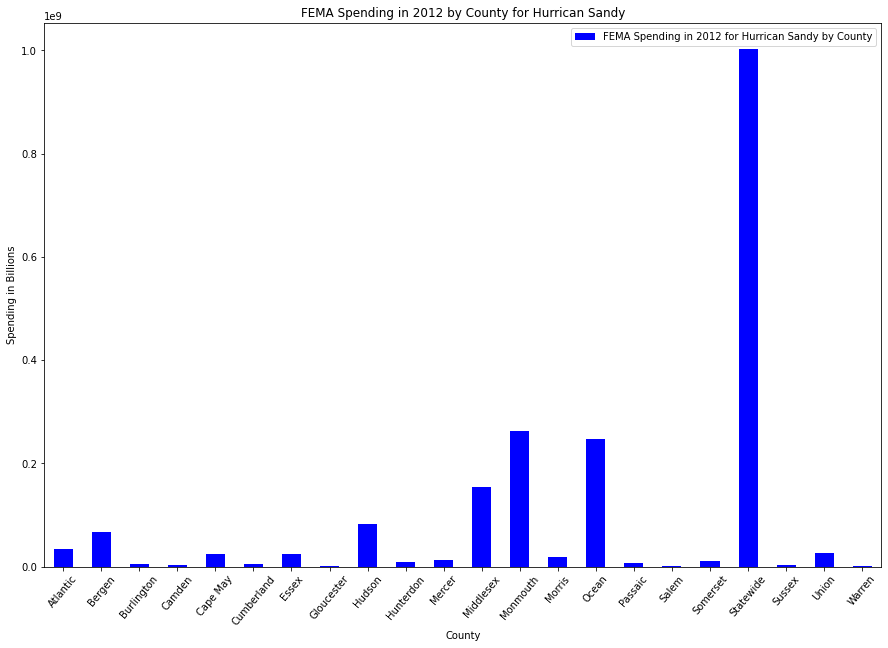

In [41]:

sandy_counties_df.plot(kind="bar",y="federalObligatedAmount",figsize =(15,10), label="FEMA Spending in 2012 for Hurrican Sandy by County", color="b")



plt.title("FEMA Spending in 2012 by County for Hurrican Sandy")
plt.xlabel("County")
plt.ylabel("Spending in Billions")
plt.xticks(rotation= 50)

plt.savefig('FEMA Spending in 2012 in for Hurricane Sandy by County.png')


In [42]:

sandy_year_filter_df = filtered_data_df.loc[filtered_data_df["state"]== "New Jersey"]

sandy_year_df = sandy_year_filter_df.groupby("year")["federalObligatedAmount"].sum()

sandy_year_df = pd.DataFrame(sandy_year_df)

sandy_year_df.head(20)


,federalObligatedAmount
year,
1999,3.934915e+07
2000,6.890793e+06
2001,8.693533e+07
2003,3.664465e+07
2004,1.119867e+07
2005,3.449433e+05
2006,2.168306e+06
2007,1.768710e+07
2009,1.218295e+07


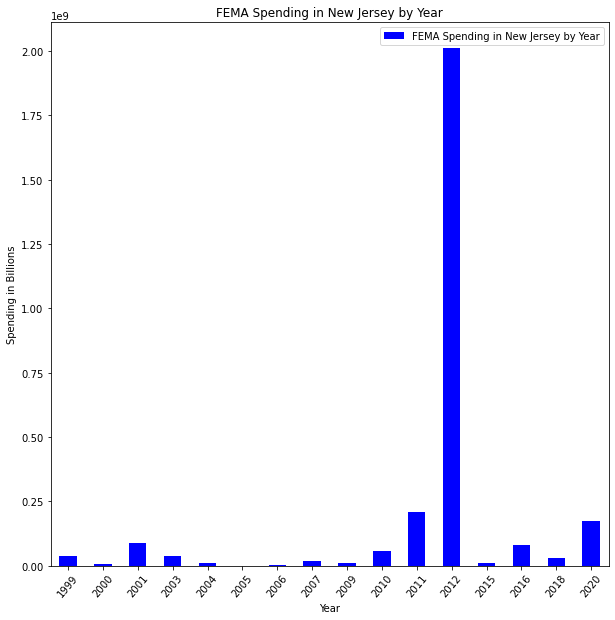

In [43]:

sandy_year_df.plot(kind="bar",y="federalObligatedAmount",figsize =(10,10), label="FEMA Spending in New Jersey by Year", color="b")



plt.title("FEMA Spending in New Jersey by Year")
plt.xlabel("Year")
plt.ylabel("Spending in Billions")
plt.xticks(rotation= 50)

plt.savefig('FEMA Spending in New Jersey by Year.png')